In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('heart.attack.csv')

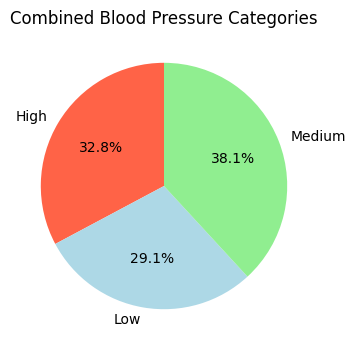

In [48]:
# تقسيمهم لاثنين كانتجر
# 2 columns : systolic , diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# تقسيم ل3 حالات
def categorize_bp(value):
    if value < 90:
        return 'Low'
    elif 90 <= value <= 120:
        return 'Medium'
    else:
        return 'High'

#  نسوي  كولوم جديد ونخزن فيه معلومات من الداتا فريم ونطبق عليه الشروط الي فوق
df['Systolic Category'] = df['Systolic'].apply(categorize_bp)
df['Diastolic Category'] = df['Diastolic'].apply(categorize_bp)

#نحسب  الكاونت 
systolic_counts = df['Systolic Category'].value_counts(normalize=True) * 100
diastolic_counts = df['Diastolic Category'].value_counts(normalize=True) * 100

# نجمعهم كداتا فريم وحده
combined_counts = systolic_counts.add(diastolic_counts, fill_value=0)

# رسم
plt.figure(figsize=(6, 4))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=90, colors=['tomato', 'lightblue', 'lightgreen'])
plt.title('Combined Blood Pressure Categories')
plt.show()



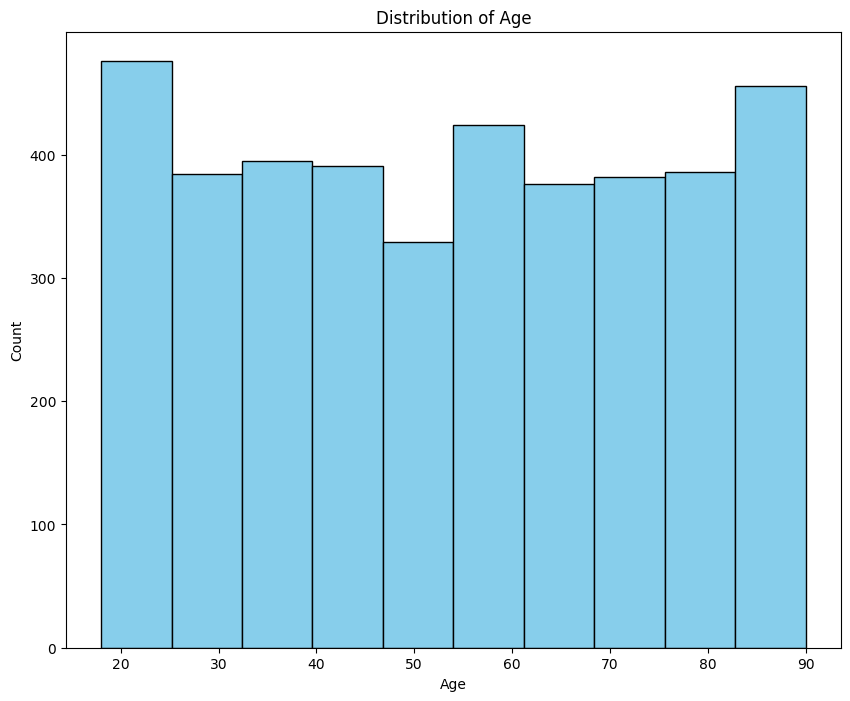

In [64]:
plt.figure(figsize=(10, 8))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


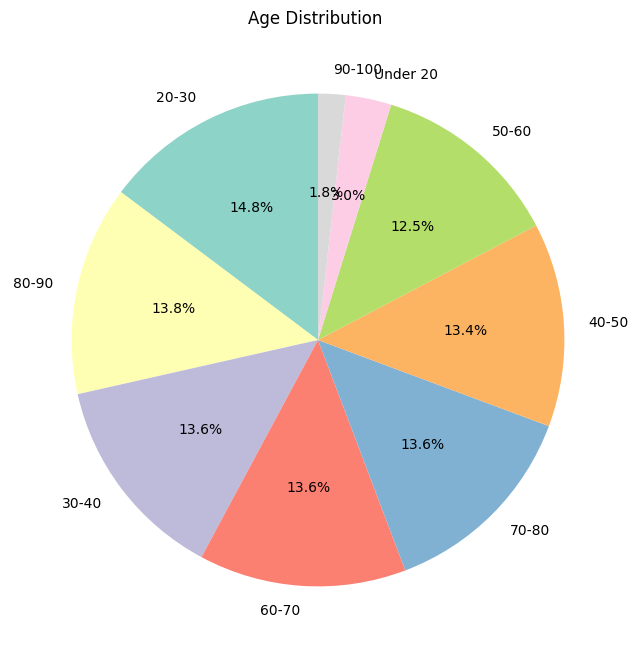

In [34]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100,]  # Age Ranges
labels = ['Under 20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']


df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


age_counts = df['Age Category'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('Set3').colors)
plt.title('Age Distribution ')
plt.show()

<ipython-input-44-eb830e083aa8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk_mean = df.groupby('Age Category')['Heart Attack Risk'].mean()


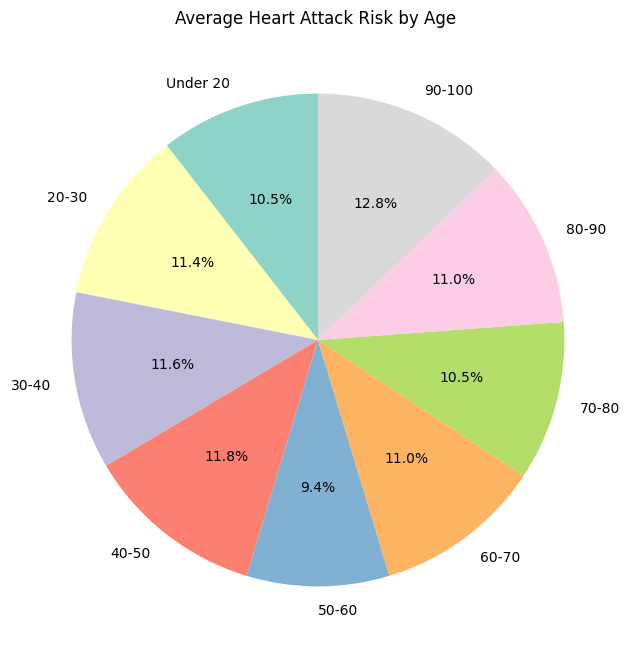

In [44]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Age ranges
labels = ['Under 20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average 
age_risk_mean = df.groupby('Age Category')['Heart Attack Risk'].mean()


plt.figure(figsize=(10, 8))
plt.pie(age_risk_mean, labels=age_risk_mean.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('Set3').colors)
plt.title('Average Heart Attack Risk by Age ')
plt.show()

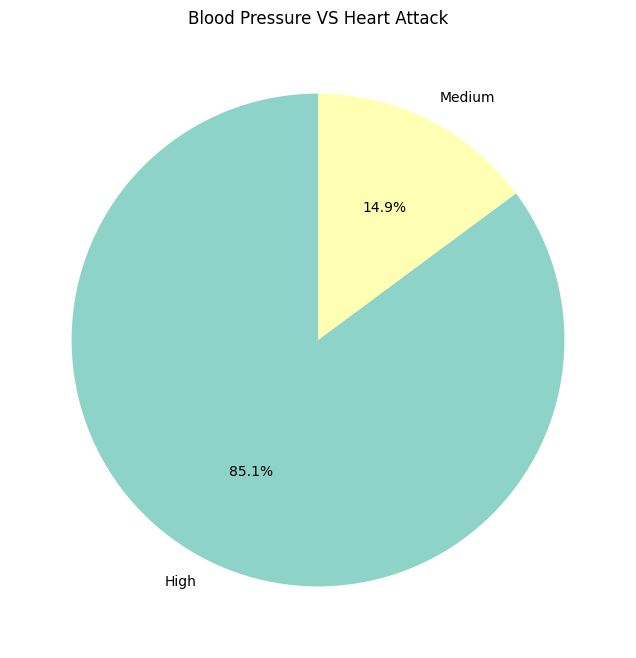

In [56]:
df['Systolic'] = df['Blood Pressure'].str.split('/').str[0].astype(int)
df['Diastolic'] = df['Blood Pressure'].str.split('/').str[1].astype(int)


def categorize_bp(systolic, diastolic):
    if systolic < 90 or diastolic < 60:
        return 'Low'
    elif 90 <= systolic <= 120 and 60 <= diastolic <= 80:
        return 'Medium'
    else:
        return 'High'


df['BP Category'] = df.apply(lambda row: categorize_bp(row['Systolic'], row['Diastolic']), axis=1)

# Count 
bp_counts = df['BP Category'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(bp_counts, labels=bp_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('Set3').colors)
plt.title('Blood Pressure VS Heart Attack')
plt.show()